In [26]:
import pandas as pd
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from textblob import TextBlob


In [32]:
# Load CSV data
file_path = 'BritishAirways_reviews.csv' 
reviews_df = pd.read_csv(file_path)


In [34]:
print(reviews_df.head())

   Unnamed: 0                                            reviews
0           0  Not Verified | We bought tickets for a Geneva-...
1           1  ✅ Trip Verified |   Appalling service with fai...
2           2  ✅ Trip Verified | British Airways charge you f...
3           3  ✅ Trip Verified | What is wrong with you guys?...
4           4  ✅ Trip Verified |   We booked two business cla...


In [5]:
# Check for missing data
print(reviews_df.isnull().sum())

reviews    0
dtype: int64


In [6]:
print(reviews_df.columns)

Index(['reviews'], dtype='object')


In [7]:
print(reviews_df.dtypes)

reviews    object
dtype: object


In [38]:
# Clean the reviews
def clean_text(text):
    # Remove verified tags and other unwanted text
    text = re.sub(r'Not Verified|✅ Trip Verified', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

reviews_df['cleaned_reviews'] = reviews_df['reviews'].apply(clean_text)


In [40]:
# Display the cleaned reviews
print(reviews_df[['reviews', 'cleaned_reviews']].head())

                                             reviews  \
0  Not Verified | We bought tickets for a Geneva-...   
1  ✅ Trip Verified |   Appalling service with fai...   
2  ✅ Trip Verified | British Airways charge you f...   
3  ✅ Trip Verified | What is wrong with you guys?...   
4  ✅ Trip Verified |   We booked two business cla...   

                                     cleaned_reviews  
0  bought tickets genevalondon flight got airport...  
1  appalling service failing defective fleet a380...  
2  british airways charge pleasure choosing seat ...  
3  wrong guys people pay lots money business clas...  
4  booked two business class seat british airways...  


In [9]:
# Sample data cleaning
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
cleaned_reviews = []

#  Process each review from the DataFrame
for review in reviews_df['reviews']:
    tokens = word_tokenize(review.lower())
    clean_tokens = [
        lemmatizer.lemmatize(word) 
        for word in tokens 
        if word.isalnum() and word not in stopwords.words('english')
    ]
    cleaned_BritishAirways.append(' '.join(clean_tokens))

# Write the cleaned reviews to a new file
with open('cleaned_reviews.txt', 'w') as file:
    for cleaned_review in cleaned_BritishAirways:
        file.write(cleaned_review + '\n')


#### Sentiment Analysis

In [ ]:
!pip install textblob

In [42]:
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

reviews_df['sentiment'] = reviews_df['cleaned_reviews'].apply(get_sentiment)

In [44]:
# Display the results
print(reviews_df[['cleaned_reviews', 'sentiment']].head())

                                     cleaned_reviews sentiment
0  bought tickets genevalondon flight got airport...   neutral
1  appalling service failing defective fleet a380...  positive
2  british airways charge pleasure choosing seat ...  positive
3  wrong guys people pay lots money business clas...  positive
4  booked two business class seat british airways...  negative


In [46]:
# Count the occurrences of each sentiment
sentiment_counts = reviews_df['sentiment'].value_counts()
print(sentiment_counts)


sentiment
positive    625
negative    356
neutral      19
Name: count, dtype: int64


In [48]:
print(len(reviews_df))


1000


#### Word Cloud

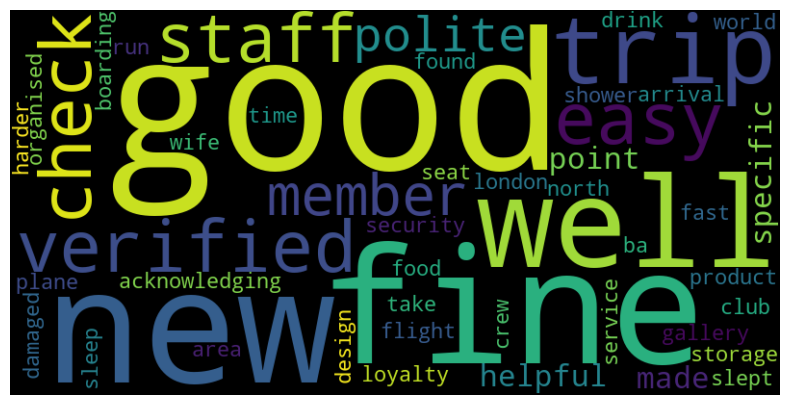

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(' '.join(clean_tokens))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
# Set the visual style
sns.set(style='whitegrid')


In [77]:
# Count the occurrences of each sentiment
sentiment_counts = reviews_df['sentiment'].value_counts()

# Calculate percentages
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Display the percentages
print(sentiment_percentages)


sentiment
positive    62.5
negative    35.6
neutral      1.9
Name: count, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_3856\203533421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='pastel')


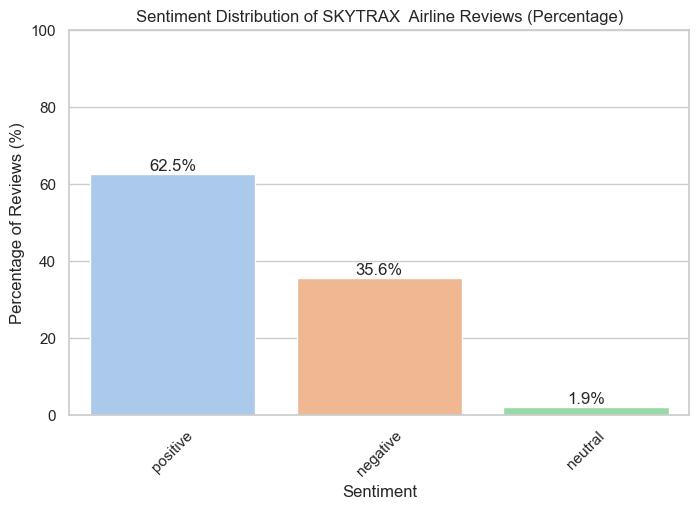

In [79]:
# Create a bar plot for percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_percentages.index, y=sentiment_percentages.values, palette='pastel')
plt.title('Sentiment Distribution of SKYTRAX  Airline Reviews (Percentage)')
plt.xlabel('Sentiment')
plt.ylabel('Percentage of Reviews (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to 100%
for i in range(len(sentiment_percentages)):
    plt.text(i, sentiment_percentages.values[i] + 1, f'{sentiment_percentages.values[i]:.1f}%', ha='center')
plt.show()


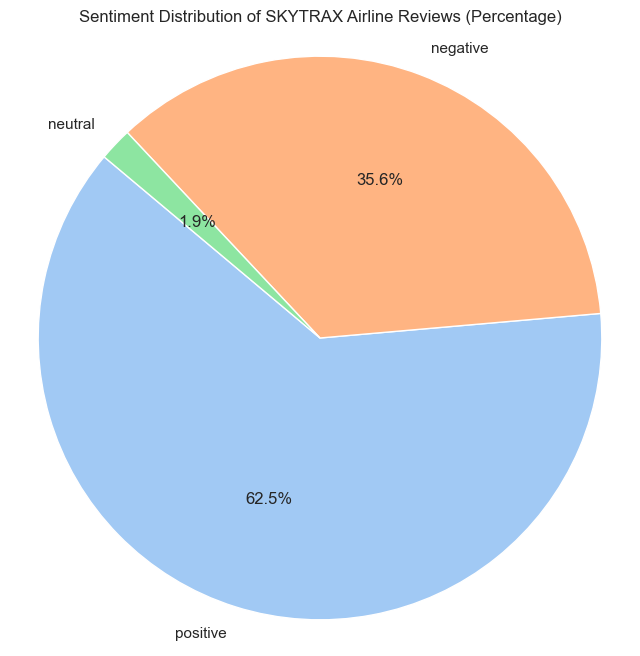

In [69]:
# Create a pie chart for percentages
plt.figure(figsize=(8, 8))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sentiment Distribution of SKYTRAX Airline Reviews (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
